## 딥러닝 순서
1. 데이터셋 업로드

2. 데이터 전처리

3. 모델 구성

4. 모델 컴파일

5. 모델 훈련

6. 정확도 평가

## MNIST
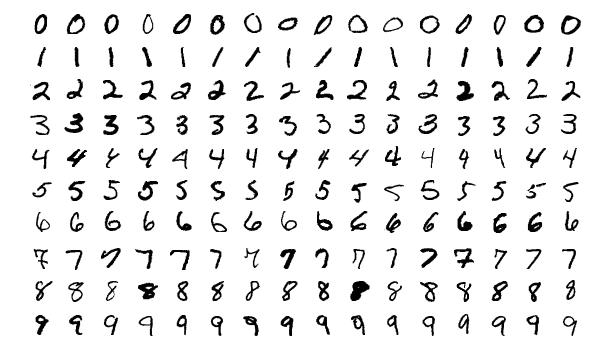

In [2]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
# GPU 사용 여부 확인
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
import numpy as np
np.set_printoptions(linewidth=200) # 출력 결과의 너비를 늘리는 부분

for i in range(2):
  for j in range(28):
    for k in range(28):
      value = x_train[i][j][k]
      formatted_value = "{:0.4f}".format(value)
      output = "0.0   " if value == 0 else formatted_value
      print(output, end=' ')
    print()
  print()

0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
0.0    0.0    0

In [6]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Dense Layer에 들어가기 위해 1차원으로 flatten
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2023 - accuracy: 0.9396
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0803 - accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0526 - accuracy: 0.9832
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0370 - accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0274 - accuracy: 0.9912


In [7]:
# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9753
테스트 정확도: 0.9753000140190125


## 2. Fashion-MNIST
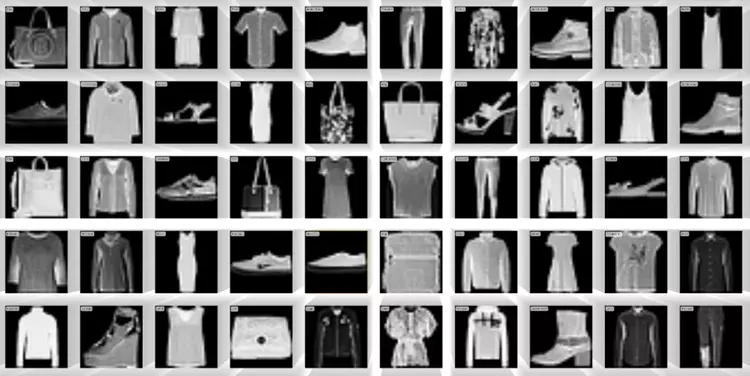

In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Fashion MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# 2-1. 데이터 전처리: 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [21]:
# 2-1. 데이터 전처리 : 차원 조정
# CNN 모델에 들어가기 위해서는 채널을 명시해야 함
# 흑백 이미지이기 때문에 1 channel이므로 (데이터 수(60000), 이미지 크기(28x28), 채널수(1))로 reshape
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [22]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [29]:
# 3. 모델 구성

# layer의 파라미터: filter, (kernel_size), stride=(1,1), padding='valid', activation=None
model = models.Sequential([
  # Convolution Layer
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'), #28x28x1 --> 28x28x32
  layers.MaxPooling2D((2, 2)), # 28x28x32 --> 14x14x32

  layers.Conv2D(64, (3, 3), activation='relu', padding='same'), # 14x14x32 --> 14x14x64
  layers.MaxPooling2D((2, 2)), # 14x14x64 --> 7x7x64

  # Dense Layer
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax') # 마지막에 class가 10개이므로
])

In [30]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# 모델 요약 출력
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [31]:
# 5. 모델 훈련
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4268 - acc: 0.8455 - val_loss: 0.3247 - val_acc: 0.8855
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2862 - acc: 0.8958 - val_loss: 0.2947 - val_acc: 0.8974
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2437 - acc: 0.9112 - val_loss: 0.2679 - val_acc: 0.9058
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2128 - acc: 0.9216 - val_loss: 0.2971 - val_acc: 0.8968
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1884 - acc: 0.9305 - val_loss: 0.2384 - val_acc: 0.9143
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1673 - acc: 0.9376 - val_loss: 0.2590 - val_acc: 0.9090
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1466 - acc: 0.9459 - val_loss: 0.2388 - val_acc: 0.9207
Epoch 8/10
1875/1875 [==============================] - 6s 3ms

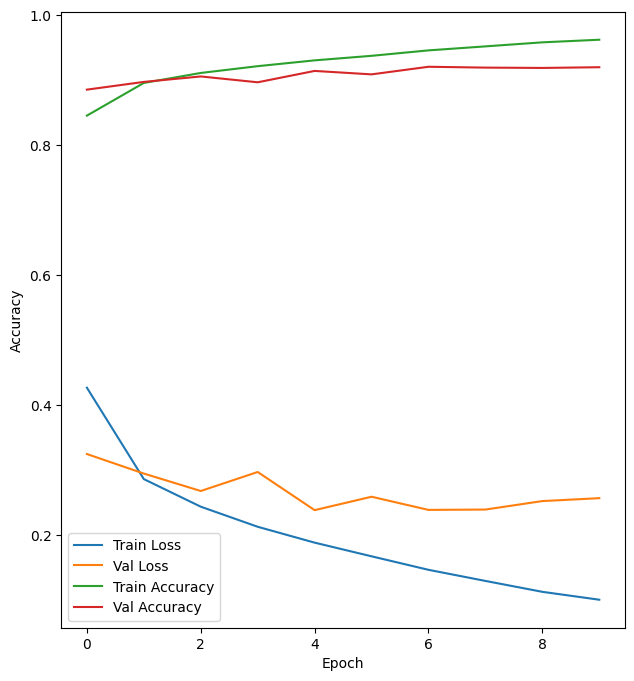

In [32]:
# 학습곡선 그리기
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label='Val Loss')

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['acc'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],label='Val Accuracy')
  plt.legend()

  plt.show()

plot_history(history)

In [33]:
# 6. 테스트 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2568 - acc: 0.9200
테스트 정확도: 0.9200000166893005
